In [23]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('./Dataset/GuoData.csv')
df.head()

,Unnamed: 0,Actb,Ahcy,Aqp3,Atp12a,Bmp4,Cdx2,Creb312,Cebpa,Dab2,...,Sox2,Sall4,Sox17,Snail,Sox13,Tcfap2a,Tcfap2c,Tcf23,Utf1,Tspan8
0,1,-0.541050,1.203007,-1.030746,-1.064808,-0.494782,0.167143,1.369092,-1.083061,-0.668057,...,1.351757,1.793476,-0.783185,1.408063,0.031991,0.351257,1.078982,-0.942981,-1.348892,1.051999
1,1,-0.680832,1.355306,-2.456375,-1.234350,-0.645494,-1.003868,1.207595,-1.208023,-0.800388,...,1.363533,1.782172,-1.532477,1.361172,0.501715,-1.082362,0.930112,-1.064399,-1.469397,0.996275
2,1,-1.056038,1.280447,-2.046133,-1.439795,-0.828121,-0.983404,1.460032,-1.359447,-0.530701,...,1.296802,1.567402,-3.194157,1.301777,0.445219,-0.031284,1.005767,-1.211529,-1.615421,0.651393
3,1,-0.732331,1.326911,-2.464234,-1.244323,-0.654359,-0.947023,1.265609,-1.215373,-0.765212,...,1.684100,1.915556,-2.962515,1.349710,-1.875957,-1.699892,1.059458,-1.071541,-1.476485,0.699586
4,1,-0.629333,1.244308,-1.316815,-1.304162,-0.707552,-1.429070,0.895578,0.007785,-0.644606,...,1.304653,1.761825,-1.265379,1.320533,0.609864,-0.413826,0.888624,-1.114394,-1.519017,0.798985


In [15]:
cell_labels = df['Unnamed: 0']
data = df.drop("Unnamed: 0", axis=1)
sc = StandardScaler()
scaled_data = sc.fit_transform(data)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])

In [16]:
pca_df["lables"] = cell_labels
pca_df.head()

,PC1,PC2,lables
0,1.102578,-0.787688,1
1,1.113674,-1.724675,1
2,0.276250,-2.363237,1
3,0.773030,-2.517412,1
4,0.514028,-1.778956,1


In [17]:
pca_df["lables"].value_counts()

lables
64 TE     96
16        75
32 TE     60
32 ICM    49
64 PE     44
8         43
4         23
2         19
64 EPI    19
1          9
Name: count, dtype: int64

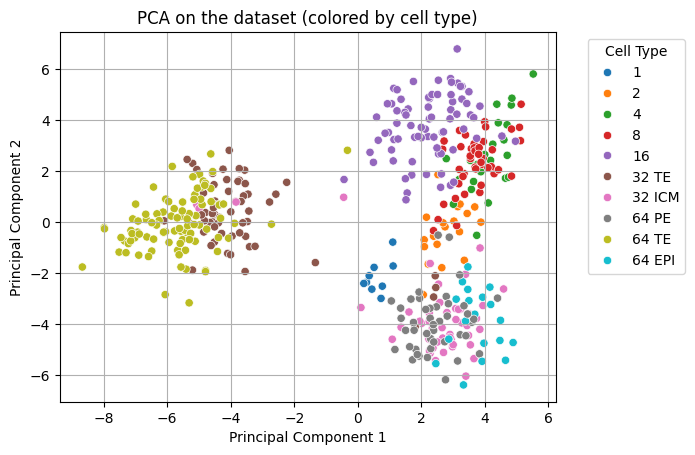

In [20]:
sns.scatterplot(pca_df, x="PC1", y="PC2", hue="lables")
plt.title('PCA on the dataset (colored by cell type)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


In [38]:
pca = PCA()
pca.fit_transform(scaled_data)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.where(cumulative_variance > 0.8)[0][0] + 1
num_components

np.int64(11)

In [39]:
pca.explained_variance_ratio_

array([3.27634644e-01, 1.81344925e-01, 8.48833378e-02, 5.88635808e-02,
       3.51921238e-02, 2.95043781e-02, 2.67233380e-02, 1.80711556e-02,
       1.66119746e-02, 1.50665563e-02, 1.44982955e-02, 1.35180584e-02,
       1.12306514e-02, 1.07224126e-02, 9.82205480e-03, 9.47731536e-03,
       8.88351332e-03, 8.30899325e-03, 7.74608421e-03, 7.39163393e-03,
       6.76206951e-03, 6.44200853e-03, 6.05473521e-03, 5.98427212e-03,
       5.90282781e-03, 5.33434044e-03, 5.25514918e-03, 4.78596100e-03,
       4.61622114e-03, 4.49805217e-03, 4.29461854e-03, 4.08650582e-03,
       3.93230795e-03, 3.82859640e-03, 3.59537040e-03, 3.51428403e-03,
       3.37118740e-03, 3.12973574e-03, 2.92470811e-03, 2.67140762e-03,
       2.35071910e-03, 2.30874351e-03, 2.01640517e-03, 1.95032448e-03,
       1.82313902e-03, 1.59618959e-03, 1.47509339e-03, 7.34171529e-18])

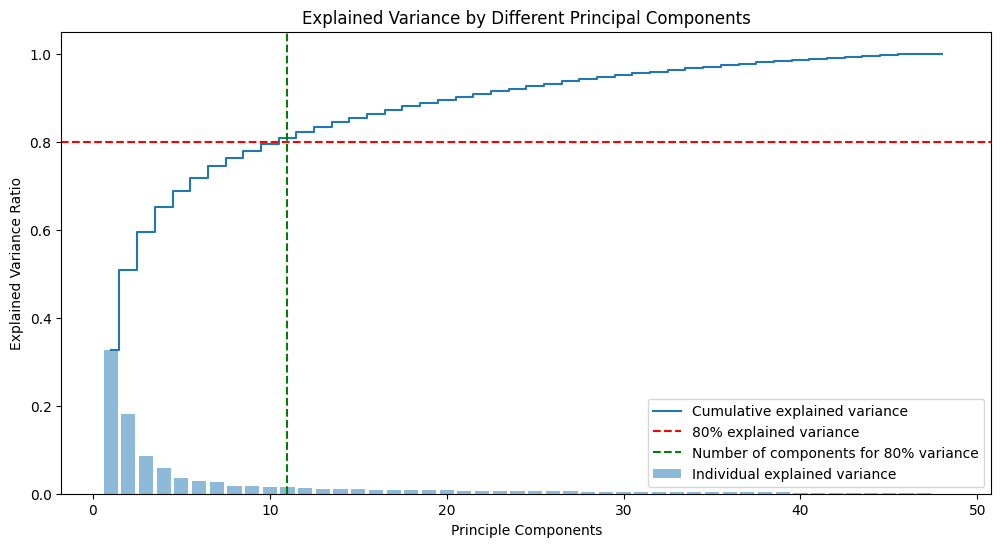

In [40]:
# figure, bar, step, axhline, axvline, label, legend, title
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label="Individual explained variance")
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, where="mid", label="Cumulative explained variance")
plt.axhline(y=0.8, color="r", linestyle="--", label="80% explained variance")
plt.axvline(x=num_components, color="g", linestyle="--", label="Number of components for 80% variance")
plt.xlabel("Principle Components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.title('Explained Variance by Different Principal Components')
plt.show()


### Key Insight
* Blue bars represent the variance explained by each principal component.
* The orange line represents the cumulative explained variance.
* The red dashed line marks the 80% explained variance threshold.
* The green dashed line indicates the number of principal components required to reach the 80% threshold (11 components).
* As you can see, the first few principal components contribute a significant portion of the total variance, while the later components explain a smaller amount of variance.
* the first 11 principal components together account for over 80% of the total variance in the dataset, capturing most of the significant information.

### PCA Analysis of Different Cell Types
In the PCA plot, both Principal Component 1 (PC1) and Principal Component 2 (PC2) contribute to the separation of different cell types, including the TE cell types (32TE and 64TE).

From the scatter plot, it appears that:

* PC1 clearly separates 32TE and 64TE from most other cell types, especially from those located on the right side of the plot (cell types "4", "8", "16", and "32 ICM").
PC2 also contributes to the separation, though to a lesser extent compared to PC1. It provides some separation between the 64TE cells and other types at the top of the plot (specifically, "64 EPI" and "64 PE").
Thus, based on this visualization, PC1 seems to be the most useful for distinguishing TE cell types (32TE and 64TE) from other cell types. However, since PCA is a linear method, it might not capture more complex patterns in the data. Depending on the biological question, other more complex methods or combinations of principal components (PCs) might be more appropriate.

* Note that this interpretation is based on a visual assessment of the plot. For a more rigorous evaluation, you could consider using statistical methods or machine learning algorithms to quantify the performance of the PCs in distinguishing between cell types.

In [43]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])
pca_df["labels"] = cell_labels
pca_df

,PC1,PC2,PC3,labels
0,1.102578,-0.787688,4.719307,1
1,1.113674,-1.724675,5.337998,1
2,0.276250,-2.363237,5.136926,1
3,0.773030,-2.517412,4.607077,1
4,0.514028,-1.778956,5.076129,1
...,...,...,...,...
432,-4.817638,1.441280,0.095076,64 TE
433,-5.190719,1.774619,0.136113,64 TE
434,-4.946508,0.897808,1.382054,64 TE
435,-5.515037,0.785239,0.083827,64 TE


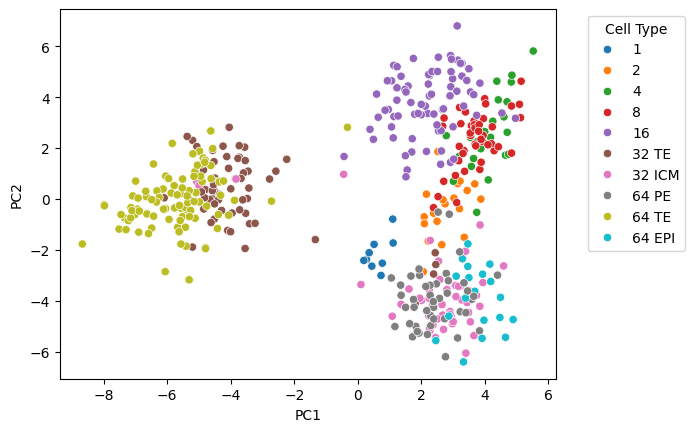

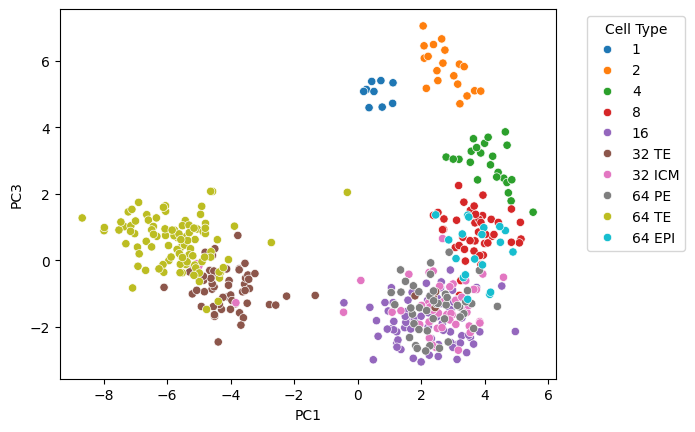

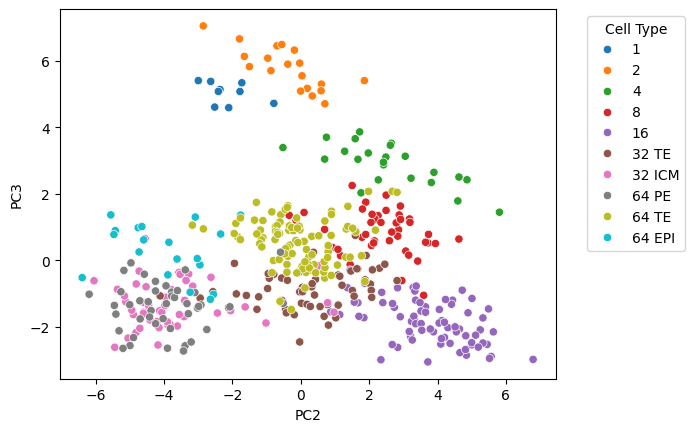

In [49]:
sns.scatterplot(pca_df, x="PC1", y="PC2", hue="labels")
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

sns.scatterplot(pca_df, x="PC1", y="PC3", hue="labels")
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

sns.scatterplot(pca_df, x="PC2", y="PC3", hue="labels")
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Key Insights:
* The figure above shows the different cell types in the space defined by the different principal component pairs: PC1 and PC2, PC1 and PC3, and PC2 and PC3. Each cell type is represented by a different color.

* Upon visual inspection, it appears that the combination of PC1 and PC3 provides the most obvious separation of the “2” cell phase from the rest of the phase. This conclusion is based on the observation that the “2” cell stage data points (orange) are largely separated from the other points on the PC3 axis.


## KMeans 


### Using the Elbow Rule to Determine the Optimal Number of Clusters

The elbow rule is a common method in cluster analysis used to determine the optimal number of clusters. The basic idea is that as the number of clusters increases, the **inertia** (sum of squared distances from the clusters' centers) decreases, but the rate of decrease slows down.

At a certain point, the reduction in inertia slows sharply, creating an **inflection point**, which resembles an elbow in a plot. The number of clusters at this inflection point is considered the **optimal number of clusters**.

### Steps to Apply the Elbow Rule:

1. **Inertia**: In clustering, inertia measures how well the data points are grouped around their cluster centers. It is the sum of the squared distances between each point and the centroid of its assigned cluster.
2. **Decreasing Inertia**: As more clusters are added, inertia decreases because data points are grouped into more refined clusters.
3. **Inflection Point**: The goal is to find the "elbow" or inflection point where the decrease in inertia slows down. This point represents the best balance between minimizing inertia and avoiding overfitting with too many clusters.

### Key Insights:

- The **elbow curve** is a plot of the number of clusters (x-axis) versus inertia (y-axis).
- **KMeans** algorithm commonly uses inertia to evaluate how well clusters fit the data.
- Try different numbers of clusters and plot the inertia values to determine the optimal number.



In [63]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

inertia = []

for cluster_num in range(1, 15):
    kmeans = KMeans(n_clusters=cluster_num, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

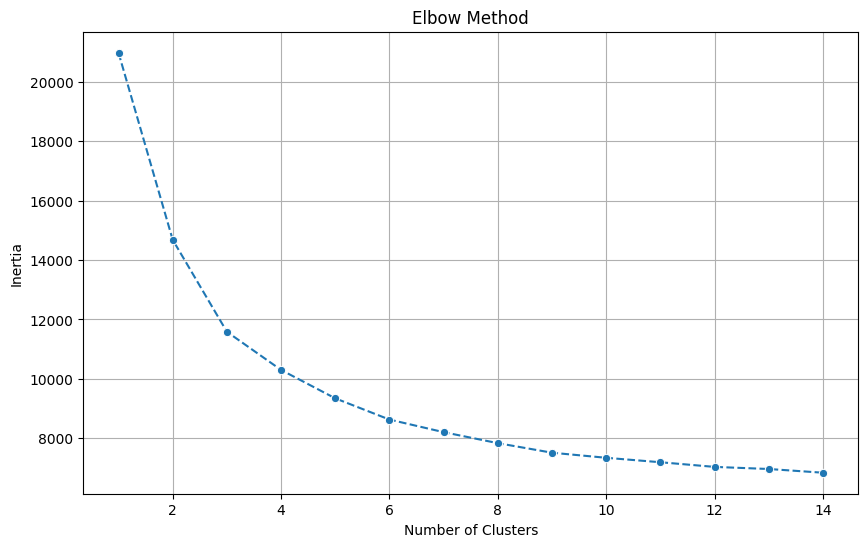

In [67]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 15), y=inertia, marker="o", linestyle="--")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [68]:
# Re-applying KMeans with 3 clusters due to the interrupted state
kmeans = KMeans(n_clusters=3, n_init=10)
clusters = kmeans.fit_predict(scaled_data)
data["clusters"] = clusters
data.head()

,Actb,Ahcy,Aqp3,Atp12a,Bmp4,Cdx2,Creb312,Cebpa,Dab2,DppaI,...,Sall4,Sox17,Snail,Sox13,Tcfap2a,Tcfap2c,Tcf23,Utf1,Tspan8,clusters
0,-0.541050,1.203007,-1.030746,-1.064808,-0.494782,0.167143,1.369092,-1.083061,-0.668057,1.553758,...,1.793476,-0.783185,1.408063,0.031991,0.351257,1.078982,-0.942981,-1.348892,1.051999,2
1,-0.680832,1.355306,-2.456375,-1.234350,-0.645494,-1.003868,1.207595,-1.208023,-0.800388,1.435306,...,1.782172,-1.532477,1.361172,0.501715,-1.082362,0.930112,-1.064399,-1.469397,0.996275,2
2,-1.056038,1.280447,-2.046133,-1.439795,-0.828121,-0.983404,1.460032,-1.359447,-0.530701,1.340283,...,1.567402,-3.194157,1.301777,0.445219,-0.031284,1.005767,-1.211529,-1.615421,0.651393,2
3,-0.732331,1.326911,-2.464234,-1.244323,-0.654359,-0.947023,1.265609,-1.215373,-0.765212,1.431401,...,1.915556,-2.962515,1.349710,-1.875957,-1.699892,1.059458,-1.071541,-1.476485,0.699586,2
4,-0.629333,1.244308,-1.316815,-1.304162,-0.707552,-1.429070,0.895578,0.007785,-0.644606,1.381937,...,1.761825,-1.265379,1.320533,0.609864,-0.413826,0.888624,-1.114394,-1.519017,0.798985,2


## Kmeans, DBSCAN, GaussianMixture

In [91]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

In [83]:
df = pd.read_csv('./Dataset/GuoData.csv')
df

,Unnamed: 0,Actb,Ahcy,Aqp3,Atp12a,Bmp4,Cdx2,Creb312,Cebpa,Dab2,...,Sox2,Sall4,Sox17,Snail,Sox13,Tcfap2a,Tcfap2c,Tcf23,Utf1,Tspan8
0,1,-0.541050,1.203007,-1.030746,-1.064808,-0.494782,0.167143,1.369092,-1.083061,-0.668057,...,1.351757,1.793476,-0.783185,1.408063,0.031991,0.351257,1.078982,-0.942981,-1.348892,1.051999
1,1,-0.680832,1.355306,-2.456375,-1.234350,-0.645494,-1.003868,1.207595,-1.208023,-0.800388,...,1.363533,1.782172,-1.532477,1.361172,0.501715,-1.082362,0.930112,-1.064399,-1.469397,0.996275
2,1,-1.056038,1.280447,-2.046133,-1.439795,-0.828121,-0.983404,1.460032,-1.359447,-0.530701,...,1.296802,1.567402,-3.194157,1.301777,0.445219,-0.031284,1.005767,-1.211529,-1.615421,0.651393
3,1,-0.732331,1.326911,-2.464234,-1.244323,-0.654359,-0.947023,1.265609,-1.215373,-0.765212,...,1.684100,1.915556,-2.962515,1.349710,-1.875957,-1.699892,1.059458,-1.071541,-1.476485,0.699586
4,1,-0.629333,1.244308,-1.316815,-1.304162,-0.707552,-1.429070,0.895578,0.007785,-0.644606,...,1.304653,1.761825,-1.265379,1.320533,0.609864,-0.413826,0.888624,-1.114394,-1.519017,0.798985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,64 TE,0.981846,-0.652971,0.376022,1.414495,-0.372440,0.978892,0.636869,0.856056,0.767485,...,-1.112031,-0.618734,0.344299,-0.952105,0.272503,1.453339,-0.299896,-0.844418,-1.251070,1.276398
433,64 TE,1.298196,-0.980800,0.767402,1.408511,-0.551521,0.644643,-0.926355,0.478230,0.739008,...,-0.385848,-1.068621,-1.203923,-1.057349,0.064275,1.068977,-0.966150,-0.988691,-1.394258,1.154409
434,64 TE,0.716994,-0.787200,-0.020074,-1.226372,-0.638402,0.806083,-1.003183,1.200070,0.506173,...,-0.185657,-0.686556,-0.175714,-1.108408,0.262818,0.877706,-0.270610,-1.058685,-1.463726,1.170975
435,64 TE,1.003917,-1.522880,0.289572,1.532177,-0.246551,0.603714,-0.656671,-0.877241,0.940018,...,-0.911840,-1.226873,-1.071556,-0.878122,0.038448,1.324004,-0.731863,-0.742998,-1.150413,1.160433


In [85]:
df = df.rename({'Unnamed: 0': 'labels_true'}, axis=1)
df

,labels_true,Actb,Ahcy,Aqp3,Atp12a,Bmp4,Cdx2,Creb312,Cebpa,Dab2,...,Sox2,Sall4,Sox17,Snail,Sox13,Tcfap2a,Tcfap2c,Tcf23,Utf1,Tspan8
0,1,-0.541050,1.203007,-1.030746,-1.064808,-0.494782,0.167143,1.369092,-1.083061,-0.668057,...,1.351757,1.793476,-0.783185,1.408063,0.031991,0.351257,1.078982,-0.942981,-1.348892,1.051999
1,1,-0.680832,1.355306,-2.456375,-1.234350,-0.645494,-1.003868,1.207595,-1.208023,-0.800388,...,1.363533,1.782172,-1.532477,1.361172,0.501715,-1.082362,0.930112,-1.064399,-1.469397,0.996275
2,1,-1.056038,1.280447,-2.046133,-1.439795,-0.828121,-0.983404,1.460032,-1.359447,-0.530701,...,1.296802,1.567402,-3.194157,1.301777,0.445219,-0.031284,1.005767,-1.211529,-1.615421,0.651393
3,1,-0.732331,1.326911,-2.464234,-1.244323,-0.654359,-0.947023,1.265609,-1.215373,-0.765212,...,1.684100,1.915556,-2.962515,1.349710,-1.875957,-1.699892,1.059458,-1.071541,-1.476485,0.699586
4,1,-0.629333,1.244308,-1.316815,-1.304162,-0.707552,-1.429070,0.895578,0.007785,-0.644606,...,1.304653,1.761825,-1.265379,1.320533,0.609864,-0.413826,0.888624,-1.114394,-1.519017,0.798985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,64 TE,0.981846,-0.652971,0.376022,1.414495,-0.372440,0.978892,0.636869,0.856056,0.767485,...,-1.112031,-0.618734,0.344299,-0.952105,0.272503,1.453339,-0.299896,-0.844418,-1.251070,1.276398
433,64 TE,1.298196,-0.980800,0.767402,1.408511,-0.551521,0.644643,-0.926355,0.478230,0.739008,...,-0.385848,-1.068621,-1.203923,-1.057349,0.064275,1.068977,-0.966150,-0.988691,-1.394258,1.154409
434,64 TE,0.716994,-0.787200,-0.020074,-1.226372,-0.638402,0.806083,-1.003183,1.200070,0.506173,...,-0.185657,-0.686556,-0.175714,-1.108408,0.262818,0.877706,-0.270610,-1.058685,-1.463726,1.170975
435,64 TE,1.003917,-1.522880,0.289572,1.532177,-0.246551,0.603714,-0.656671,-0.877241,0.940018,...,-0.911840,-1.226873,-1.071556,-0.878122,0.038448,1.324004,-0.731863,-0.742998,-1.150413,1.160433


In [89]:
scaled_data.shape

(437, 48)

In [90]:
# kmeans
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(scaled_data)
df["labels_kmeans"] = kmeans.labels_

In [92]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_data)
df["labels_dbscan"] = dbscan.labels_

In [95]:
# GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(scaled_data)
y_pred = gmm.predict(scaled_data)
df["lables_gmm"] = y_pred

In [98]:
df.head()

,labels_true,Actb,Ahcy,Aqp3,Atp12a,Bmp4,Cdx2,Creb312,Cebpa,Dab2,...,Snail,Sox13,Tcfap2a,Tcfap2c,Tcf23,Utf1,Tspan8,labels_kmeans,labels_dbscan,lables_gmm
0,1,-0.541050,1.203007,-1.030746,-1.064808,-0.494782,0.167143,1.369092,-1.083061,-0.668057,...,1.408063,0.031991,0.351257,1.078982,-0.942981,-1.348892,1.051999,1,-1,2
1,1,-0.680832,1.355306,-2.456375,-1.234350,-0.645494,-1.003868,1.207595,-1.208023,-0.800388,...,1.361172,0.501715,-1.082362,0.930112,-1.064399,-1.469397,0.996275,1,-1,2
2,1,-1.056038,1.280447,-2.046133,-1.439795,-0.828121,-0.983404,1.460032,-1.359447,-0.530701,...,1.301777,0.445219,-0.031284,1.005767,-1.211529,-1.615421,0.651393,1,-1,2
3,1,-0.732331,1.326911,-2.464234,-1.244323,-0.654359,-0.947023,1.265609,-1.215373,-0.765212,...,1.349710,-1.875957,-1.699892,1.059458,-1.071541,-1.476485,0.699586,1,-1,2
4,1,-0.629333,1.244308,-1.316815,-1.304162,-0.707552,-1.429070,0.895578,0.007785,-0.644606,...,1.320533,0.609864,-0.413826,0.888624,-1.114394,-1.519017,0.798985,1,-1,2


In [111]:
df["labels_dbscan"].value_counts()

labels_dbscan
-1    437
Name: count, dtype: int64

In [112]:
for labels_type in ['labels_kmeans', 'labels_dbscan', 'lables_gmm']:
    for cluster in df[labels_type].unique():
        counts = df.loc[df[labels_type] == cluster, "labels_true"].value_counts()
        top3 = counts.nlargest(3)
        print(f"{labels_type}:{cluster}, labels_true_top3:{top3.index.tolist()}, counts:{top3.tolist()} ")

labels_kmeans:1, labels_true_top3:['32 ICM', '64 PE', '64 EPI'], counts:[45, 44, 19] 
labels_kmeans:2, labels_true_top3:['16', '8', '4'], counts:[75, 43, 23] 
labels_kmeans:0, labels_true_top3:['64 TE', '32 TE', '32 ICM'], counts:[95, 56, 3] 
labels_dbscan:-1, labels_true_top3:['64 TE', '16', '32 TE'], counts:[96, 75, 60] 
lables_gmm:2, labels_true_top3:['32 ICM', '64 PE', '64 EPI'], counts:[45, 44, 19] 
lables_gmm:0, labels_true_top3:['16', '8', '4'], counts:[75, 43, 23] 
lables_gmm:1, labels_true_top3:['64 TE', '32 TE', '32 ICM'], counts:[95, 56, 3] 


## Kmeans based on PCA

In [120]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(reduced_features, columns=["PC1", "PC2"])
pca_df["lables_true"] = cell_labels
pca_df.head()

,PC1,PC2,lables_true
0,1.102578,-0.787688,1
1,1.113674,-1.724675,1
2,0.276250,-2.363237,1
3,0.773030,-2.517412,1
4,0.514028,-1.778956,1


In [121]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(reduced_features)
pca_df["labels_kmeans"] = kmeans.labels_
pca_df

,PC1,PC2,lables_true,labels_kmeans
0,1.102578,-0.787688,1,2
1,1.113674,-1.724675,1,2
2,0.276250,-2.363237,1,2
3,0.773030,-2.517412,1,2
4,0.514028,-1.778956,1,2
...,...,...,...,...
432,-4.817638,1.441280,64 TE,0
433,-5.190719,1.774619,64 TE,0
434,-4.946508,0.897808,64 TE,0
435,-5.515037,0.785239,64 TE,0


In [122]:
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(reduced_features)
y_pred = gmm.predict(reduced_features)
pca_df["labels_gmm"] = y_pred
pca_df.head()

,PC1,PC2,lables_true,labels_kmeans,labels_gmm
0,1.102578,-0.787688,1,2,1
1,1.113674,-1.724675,1,2,1
2,0.276250,-2.363237,1,2,1
3,0.773030,-2.517412,1,2,1
4,0.514028,-1.778956,1,2,1


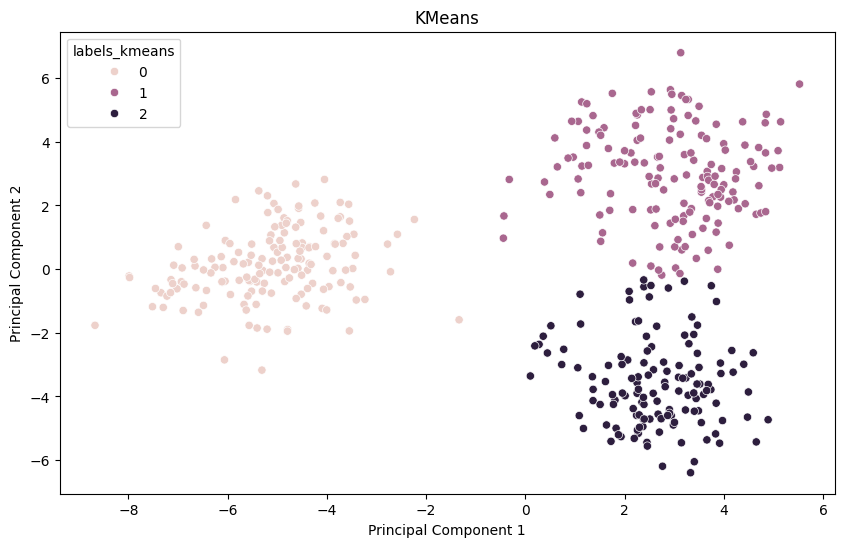

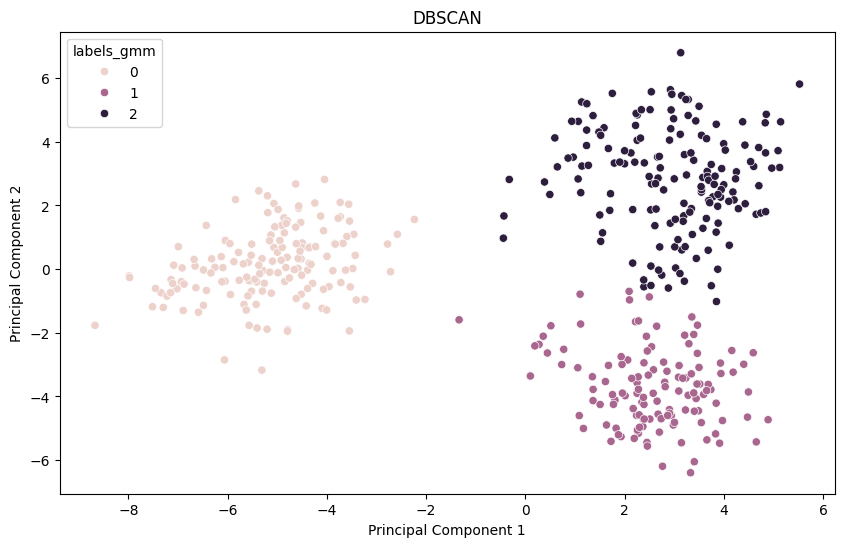

In [125]:
plt.figure(figsize=(10, 6))
sns.scatterplot(pca_df, x="PC1", y="PC2", hue="labels_kmeans")
plt.title("KMeans")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(pca_df, x="PC1", y="PC2", hue="labels_gmm")
plt.title("DBSCAN")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [126]:
pca_df

,PC1,PC2,lables_true,labels_kmeans,labels_gmm
0,1.102578,-0.787688,1,2,1
1,1.113674,-1.724675,1,2,1
2,0.276250,-2.363237,1,2,1
3,0.773030,-2.517412,1,2,1
4,0.514028,-1.778956,1,2,1
...,...,...,...,...,...
432,-4.817638,1.441280,64 TE,0,0
433,-5.190719,1.774619,64 TE,0,0
434,-4.946508,0.897808,64 TE,0,0
435,-5.515037,0.785239,64 TE,0,0


In [128]:
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_data)
reduced_features

array([[ 1.10257784, -0.78768779,  4.71930719],
       [ 1.11367402, -1.72467466,  5.33799817],
       [ 0.27624995, -2.36323731,  5.13692589],
       ...,
       [-4.94650766,  0.89780833,  1.38205388],
       [-5.51503683,  0.78523858,  0.08382694],
       [-5.15591796,  0.88956592, -0.45156434]])

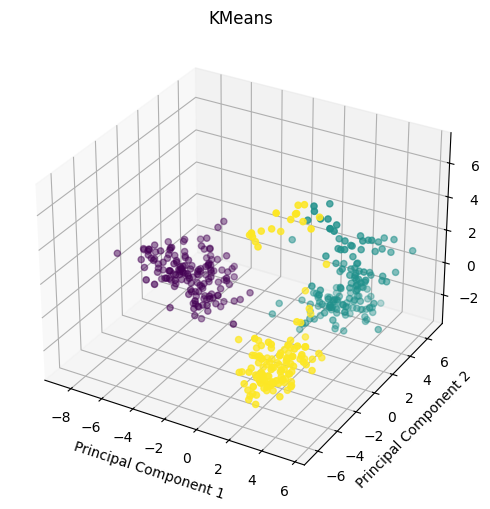

In [129]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=pca_df["labels_kmeans"])
ax.set_title('KMeans')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

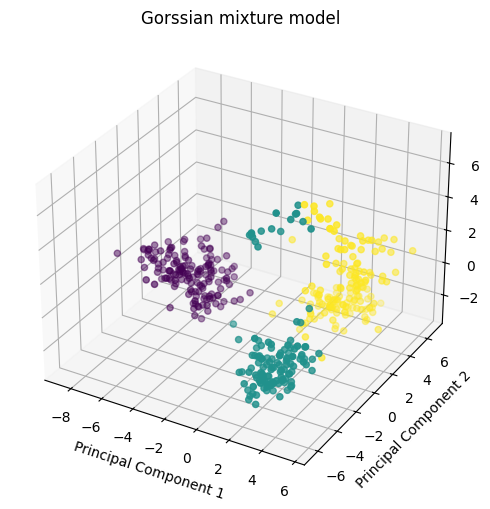

In [130]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=pca_df["labels_gmm"])
ax.set_title('Gorssian mixture model')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()